# CS 584 :: Data Mining :: George Mason University :: Spring 2024


# Homework 2: Linear Regression&Neural Networks

- **100 points [8% of your final grade]**
- **Due Sunday, March 10 by 11:59pm**

- *Goals of this homework:* (1) implement the linear regression model; (2) implement the multi-layer perceptron neural network; (3) tune the hyperparameters of MLP model to produce classification result as good as possible.

- *Submission instructions:* for this homework, you need to submit to two different platforms. First, you should submit your notebook file to Blackboard (look for the homework 2 assignment there). Please name your submission **FirstName_Lastname_hw2.ipynb**, so for example, my submission would be something like **Ziwei_Zhu_hw2.ipynb**. Your notebook should be **fully executed** so that we can see all outputs. Then, you need to submit a output file from this notebook (you will see later in this notebook) to the HW2 page in the http://miner2.vsnet.gmu.edu website.

## Part 1: Linear Regression (40 points)

Recent studies have found that novel mobile games can lead to increased physical activity. A notable example is Pokemon Go, a mobile game combining the Pokemon world through augmented reality with the real world requiring players to physically move around. Specifically, in the following study, researchers have found that Pokemon Go leads to increased levels of physical activity for the most engaged players! https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5174727/
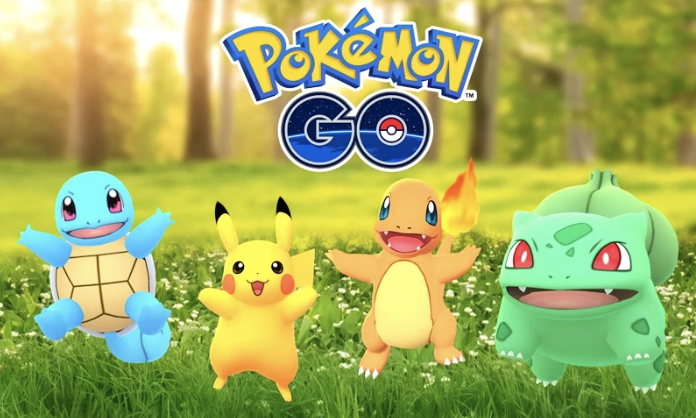



In this part, our goal is to predict the combat point of each pokemon in the 2017 Pokemon Go mobile game. Each pokemon has its own unique attributes that can help predicting its combat points. These include:

- Stamina
- Attack value
- Defense value
- Capture rate
- Flee rate
- Spawn chance
- Primary strength

The file pokemon_data.csv contains data of 146 pokemons to be used in this homework. The rows of these files refer to the data samples (i.e., pokemon samples), while the columns denote the name of the pokemon (column 1), its attributes (columns 2-8), and the combat point outcome (column 9). You can ignore column 1 for the rest of this problem.

First, let's load the data by excuting the following code.

**Note: you need to install the pandas library beforehand**

In [1]:
import numpy as np
import pandas as pd

data_frame = pd.read_csv('pokemon_data.csv')
data_frame.head()

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,primary_strength,combat_point
0,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,1079
1,Ivysaur,120,156,158,0.08,0.07,4.2,Grass,1643
2,Venusaur,160,198,200,0.04,0.05,1.7,Grass,2598
3,Charmander,78,128,108,0.16,0.10,25.3,Fire,962
4,Charmeleon,116,160,140,0.08,0.07,1.2,Fire,1568


In [24]:
data_frame.dtypes

name                 object
stamina               int64
attack_value          int64
defense_value         int64
capture_rate        float64
flee_rate           float64
spawn_chance        float64
primary_strength     object
combat_point          int64
dtype: object

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of Python. By excuting the following code, let's create one Numpy array to contain the feature data without the name column and one array to contain the combat point ground truth.

In [25]:
features = data_frame.values[:, 1:-1]
labels = data_frame.values[:, -1]
print('array of labels: shape ' + str(np.shape(labels)))
print('array of feature matrix: shape ' + str(np.shape(features)))

array of labels: shape (146,)
array of feature matrix: shape (146, 7)


Now, you may find out that we have a categorical feature 'primary_strength' in our data. Categorical features require special attention because usually they cannot be the input of regression models as they are. A potential way to treat categorical features is to simply convert each value of the feature to a separate number. However, this might impute non-existent relative associations between the features, which might not always be representative of the data (e.g., if we assign “1” to the value “green” and “2” to the value “red”, the regression algorithm will assume that “red” is greater than “green,” which is not necessarily the case). For this reason, we can use a “one hot encoding” to represent categorical features. According to this, we will create a binary column for each category of the categorical feature, which will take a value of 1 if the sample belongs to that category, and 0 otherwise. For each categorical feature of the problem, count the number of different values and implement the one hot encoding. For the remaining of the problem, you will be working with the one hot encoding of the categorical features.


In the next cell, write your code to replace the categorical feature 'primary_strength' with **one-hot encoding** and generate the new version of the Numpy array 'features'.

**Hint: if you don't remember one hot encoding, review the slides of our first-week lecture.**

**Note: do not use sklearn to automatically generate one hot encoding.**

In [3]:
#removing categorical features
not_cat_feat = data_frame.drop(['name','primary_strength' ,'combat_point'], axis =1)
not_cat_feat


,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance
0,90,126,126,0.16,0.10,69.00
1,120,156,158,0.08,0.07,4.20
2,160,198,200,0.04,0.05,1.70
3,78,128,108,0.16,0.10,25.30
4,116,160,140,0.08,0.07,1.20
...,...,...,...,...,...,...
141,160,182,162,0.16,0.09,1.80
142,320,180,180,0.16,0.09,1.60
143,82,128,110,0.32,0.09,30.00
144,122,170,152,0.08,0.06,2.00


In [26]:
print(not_cat_feat.dtypes)

stamina            int64
attack_value       int64
defense_value      int64
capture_rate     float64
flee_rate        float64
spawn_chance     float64
dtype: object


In [4]:
#one hot encoding
encode_ps = pd.get_dummies(data_frame['primary_strength'])
encode_feat = pd.concat([not_cat_feat, encode_ps], axis =1)

# Convert boolean columns to integers in encode_feat
encode_feat = encode_feat.astype({col: 'int64' for col in encode_feat.select_dtypes(include='bool').columns})
print(encode_feat.dtypes)


stamina            int64
attack_value       int64
defense_value      int64
capture_rate     float64
flee_rate        float64
spawn_chance     float64
Bug                int64
Dragon             int64
Electric           int64
Fairy              int64
Fighting           int64
Fire               int64
Ghost              int64
Grass              int64
Ground             int64
Ice                int64
Normal             int64
Poison             int64
Psychic            int64
Rock               int64
Water              int64
dtype: object


In [5]:
feat_arr_onehot = encode_feat.to_numpy()
print(feat_arr_onehot.dtype)


feat_arr_onehot.shape
encode_feat.columns

float64


Index(['stamina', 'attack_value', 'defense_value', 'capture_rate', 'flee_rate',
       'spawn_chance', 'Bug', 'Dragon', 'Electric', 'Fairy', 'Fighting',
       'Fire', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Water'],
      dtype='object')

Besides, you may also notice that other features have different scales. So, you need to standardize them: $({x-\mu})/{\sigma}$, where $\mu$ is the mean and $\sigma$ is the standard deviation. Write your code below.

**Hint: details about feature standardization is also in slides of our first-week lecture.**

**Note: You do not need to do standardize for one-hot encodings.**

In [6]:
num_features = not_cat_feat.columns
num_data = encode_feat[num_features]

sn = (num_data - num_data.mean()) / num_data.std()
sf = pd.concat([sn, encode_ps], axis=1)


sf_arr = sf.to_numpy()
sf_arr.shape, sf.columns


((146, 21),
 Index(['stamina', 'attack_value', 'defense_value', 'capture_rate', 'flee_rate',
        'spawn_chance', 'Bug', 'Dragon', 'Electric', 'Fairy', 'Fighting',
        'Fire', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
        'Psychic', 'Rock', 'Water'],
       dtype='object'))

Now, in the next cell, you need to implement your own **linear regression model** using the **Ordinary Least Square (OLS)** solution **without regularization**. And here, you should adopt the **5-fold cross-validation** method. For each fold compute and print out the **square root** of the residual sum of squares error (RSS) between the actual and predicted outcome variable. Also compute and print out the **average** square root of the RSS over all folds.

**Note: You should implement the algorithm by yourself. You are NOT allowed to use Machine Learning libraries like Sklearn.**

**Hint: Use numpy.linalg.pinv() for calculating the inverse of a matrix.**

**Hint: details about cross-validation is on page 40-42 in slides of KNN lecture.**


In [7]:
cp_arr = data_frame['combat_point'].to_numpy()
cp_arr.shape

(146,)

In [8]:
from numpy.linalg import pinv

X = sf_arr
X_b = np.c_[np.ones((feat_arr_onehot.shape[0], 1)), feat_arr_onehot]
print(X_b.dtype)

y = cp_arr
#target var 'y' has combat point of Pokemon


float64


In [9]:
#calculating rss
def calculate_rss(y_actual, y_pred):
    rss = np.sqrt(np.sum((y_actual - y_pred) ** 2))
    return rss

# 5-fold cross validation
k = 5
n = X_b.shape[0]

indices = np.arange(n)
np.random.seed(42)
np.random.shuffle(indices)

fold_sizes = np.full(k,n // k, dtype=int)
fold_sizes[:n % k]+= 1

start = 0
rss_score = []

for fold_size in fold_sizes:
    stop = start + fold_size
    test_indices = indices[start:stop]
    train_indices = np.concatenate([indices[:start], indices[stop:]])

    
    X_train, X_test = X_b[train_indices], X_b[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
#     print(f"Data type of X_train: {X_train.dtype}")
#     print(f"Data type of X_train.T @ X_train: {(X_train.T @ X_train).dtype}")
#     print(f"Data type of y_train: {y_train.dtype}")
    
    #computing the OLS sultion
    best_fit = pinv(X_train.T @ X_train) @ X_train.T @ y_train

    
    #making prediction on the test set
    y_prediction = X_test @ best_fit
    
    rss_value = calculate_rss(y_test, y_prediction)
    rss_score.append(rss_value)


rss_value_avg = np.mean(rss_score)

rss_score, rss_value_avg




([568.3307983167318,
  537.3010561028084,
  537.3010561028084,
  537.3010561028084,
  537.3010561028084],
 543.507004545593)

At the end in this part, please repeat the same experiment as in the previous step, but instead of linear regression, implement linear regression **with L2-norm regularization**. Experiment and report your results (average square root of RSS over 5-fold cross-validation) with different values of the regularization term $\lambda=\{1, 0.1, 0.01, 0.001, 0.0001\}$.

**Hint: details about the closed-form solution with regularization is on page 76 in slides of our linear regression lecture.**

In [21]:
from numpy.linalg import pinv

def closed_form_regression(X, y, lamb):
    identity = np.eye(X.shape[1])
    identity[0,0] = 0
    
    theta = pinv(X.T @ X + lamb * identity) @ X.T @ y
    return theta
    

In [22]:
lambdas = [1,0.1,0.01,0.001,0.0001]

avg_rss_scores = []

for lamb in lambdas:
    rss_scores = []
    for fold_size in fold_sizes:
        stop = start + fold_size
        test_indices = indices[start:stop]
        train_indices = np.concatenate([indices[:start], indices[stop:]])
        
        X_train, X_test = X_b[train_indices], X_b[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        
        best_fit = closed_form_regression(X_train, y_train, lamb)
        
        y_prediction = X_test @ best_fit
        
        rss_value = calculate_rss(y_test, y_prediction)
        rss_scores.append(rss_value)
        
    avg_rss = np.mean(rss_scores)
    avg_rss_scores.append(avg_rss)
    
    print(f"Lambda: {lamb}, Average RSS: {avg_rss}")

Lambda: 1, Average RSS: 504.78173651546547
Lambda: 0.1, Average RSS: 534.9791954763535
Lambda: 0.01, Average RSS: 542.523031241946
Lambda: 0.001, Average RSS: 543.4070502072798
Lambda: 0.0001, Average RSS: 543.4969932591287


## Part 2: Neural Networks (40 points)

In this part, you are going to implement your multi-layer perceptron model by the Pytorch library. You will still use the same handwritten digit image dataset from HW1. So, in the next few cells, please run the provided code to load and process the data, and creat dataset objects for further use by Pytorch.

**Note: you need to install Pytorch beforehand. Or, you can use Google Colab for this homework, which is recommended.**

In [11]:
# load data from file and split into training and validation sets
import numpy as np
data = np.loadtxt("train.txt", delimiter=',')
perm_idx = np.random.permutation(data.shape[0])
vali_num = int(data.shape[0] * 0.2)
vali_idx = perm_idx[:vali_num]
train_idx = perm_idx[vali_num:]
train_data = data[train_idx]
vali_data = data[vali_idx]
train_features = train_data[:, 1:].astype(np.float32)
train_labels = train_data[:, 0].astype(int)
vali_features = vali_data[:, 1:].astype(np.float32)
vali_labels = vali_data[:, 0].astype(int)

In [12]:
# define a Dataset class 
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
class MNISTDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx, :], self.labels[idx]

ModuleNotFoundError: No module named 'torch'

In [ ]:
training_data = MNISTDataset(train_features, train_labels)
vali_data = MNISTDataset(vali_features, vali_labels)
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
vali_dataloader = DataLoader(vali_data, batch_size=batch_size)

for X, y in train_dataloader:
    print(f"Shape of X [N, F]: {X.shape} {X.dtype}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Now, you should have the train_dataloader and vali_dataloader. Then, you need to build and train your multi-layer perceptron model by Pytorch.

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html gives a comprehansive example how to achieve this. Please read this tutorial closely, and implement the model in the next few cells. 

https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/c30c1dcf2bc20119bcda7e734ce0eb42/quickstart_tutorial.ipynb provides the interactive version, which you can run and edit.

**Note: in your implementation:** 
- you will only have three layers [784 -> 512 -> 10], you need to remove the [512 -> 512] layer in the tutorial. 
- add 'weight_decay=1e-4' in torch.optim.SGD to add L2 regularization.
- train the model for 10 epochs instead of 5 epochs.
- keep all other hyper-parameters the same as used in the tutorial.
- **You are allowed to resue the code in the tutorial for this homework**


**Note: print out the training process and the final accuracy on the validation set.**

**Note: you can use Colab for running the code with GPU for free (open a colab notebook, then Runtime->Change runtime type->Hardware accelerator->GPU)**

In [ ]:
# Write your code

## Part 3: Tune Hyperparameter [Need to submit to Miner2] (20 points)

In this part, you need to do your best to tune the hyperparameter in the MLP to build the best model and submit the predictions for the testing data to Miner2 system. First of all, let's load the testing data by excuting the following code.

In [ ]:
test_features = np.loadtxt("test.txt", delimiter=',')
print('array of testing feature matrix: shape ' + str(np.shape(test_features)))

Now, you should tune four hyperparameters:

- the number of layers and the dimension of each layer (explore as much as you can, but choose reasonable settings considering the computational resource you have)
- the activation function (choose from sigmoid, tanh, relu, leaky_relu)
- weight decay
- number of training epochs

Rules:

- Write your predictions for samples in the testing set into a file, in which each line has one integer indicating the prediction from your best model for the corresponding sample in the test.txt file. Please see the format.txt file in Miner2 as one submission example. Name the submission file hw2_Miner2.txt and submit it to Miner2 HW2 page.
- The public leaderboard shows results for 50% of randomly chosen test instances only. This is a standard practice in data mining challenge to avoid gaming of the system. The private leaderboard will be released after the deadline evaluates all the entries in the test set.
- You are allowed 5 submissions in a 24 hour cycle. 
- The final score and ranking will always be based on the last submission.
- Grading will only be based on the model performance (based on Accuracy metric) instead of ranking. You'll get full credit as long as your socre is a reasonable number.


**Hint: You can tune these hyperparameters by one randomly generated validation set, or you can also use the cross-validation method.**

**Note: you can use Colab for running the code with GPU for free**

**Hint: use the following two lines of code to generate the label predictions for test data:**
- raw_pred = model(torch.tensor(test_features).to(device).float())
- pred = np.argmax(raw_pred.to('cpu').detach().numpy(), axis=1)


In [ ]:
# Write your code here

### Question: What is your final hyperparameter setting? How do you tune them? What choices have you tried?

#### Write your answer here

### Question: your username in Miner2 and the score&ranking of your submission in Miner2 (at the time of answering this question)

#### Write your answer here